In [1]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# For cleaner plots
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

In [2]:
# -----------------------------
# 2. Load Data
# -----------------------------
df = pd.read_csv("marketing_campaign.csv", delimiter="\t")


In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())

Shape: (2240, 29)
Columns: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome    

In [4]:
# Check duplicates
print("Duplicates:", df.duplicated().sum())



Duplicates: 0


In [5]:
# Missing values
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [6]:

# -----------------------------
# 4. Data Cleaning
# -----------------------------

# Create Age column
df["Age"] = 2025 - df["Year_Birth"]

# Remove unrealistic ages (18–80 only)
df = df[(df["Age"] >= 18) & (df["Age"] <= 80)]

# Handle missing Income -> median by Education
df["Income"] = df.groupby("Education")["Income"].transform(
    lambda x: x.fillna(x.median())
)

# Remove extreme Income outliers (>200k)
df = df[df["Income"] < 200000]

In [7]:
# -----------------------------
# 5. Feature Engineering
# -----------------------------

# Total spend (all product categories)
df["TotalSpend"] = (
    df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] +
    df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
)

# Total accepted offers
df["TotalAcceptedOffers"] = (
    df["AcceptedCmp1"] + df["AcceptedCmp2"] +
    df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]
)

# Response Rate
df["ResponseRate"] = df["TotalAcceptedOffers"] / 5


In [8]:
# -----------------------------
# 6. Outlier Treatment
# -----------------------------

# Function to treat outliers with IQR (capping method)
def treat_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(series < lower, lower,
           np.where(series > upper, upper, series))

# Apply to selected numeric cols
num_cols = ["Income", "TotalSpend", "Age"]
for col in num_cols:
    df[col] = treat_outliers_iqr(df[col])


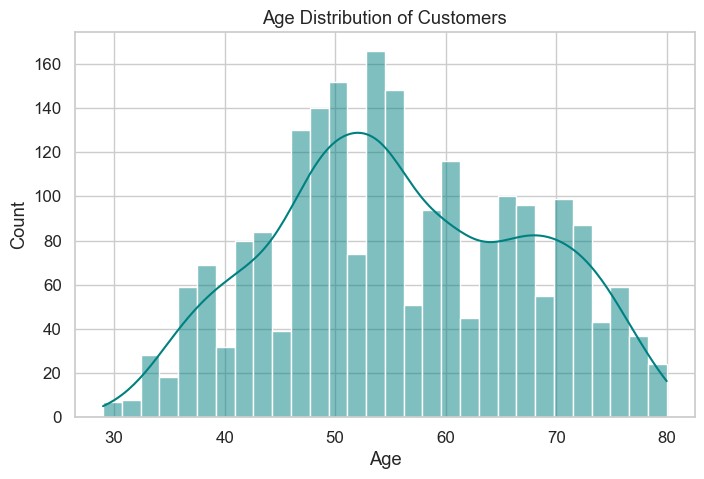

In [9]:
 # -----------------------------
# 7. Visual Exploratory Data Analysis (EDA)
# -----------------------------

# --- Demographics ---
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color="teal")
plt.title("Age Distribution of Customers")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_6076\2570427045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Marital_Status", palette="viridis")


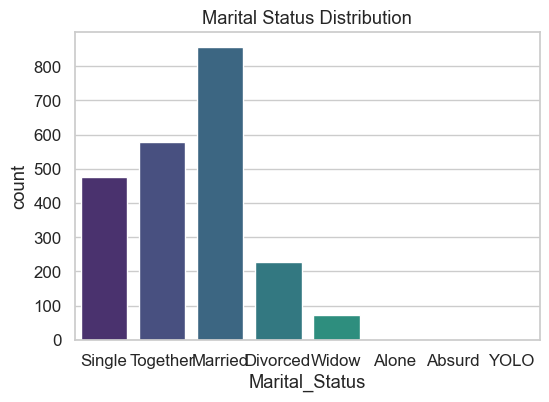

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Marital_Status", palette="viridis")
plt.title("Marital Status Distribution")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_6076\4070381102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Education", palette="Set2")


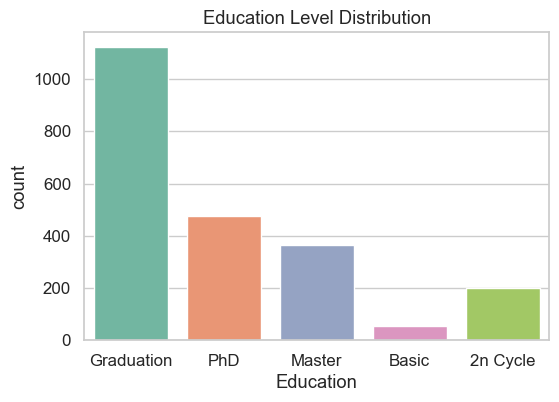

In [11]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Education", palette="Set2")
plt.title("Education Level Distribution")
plt.show()

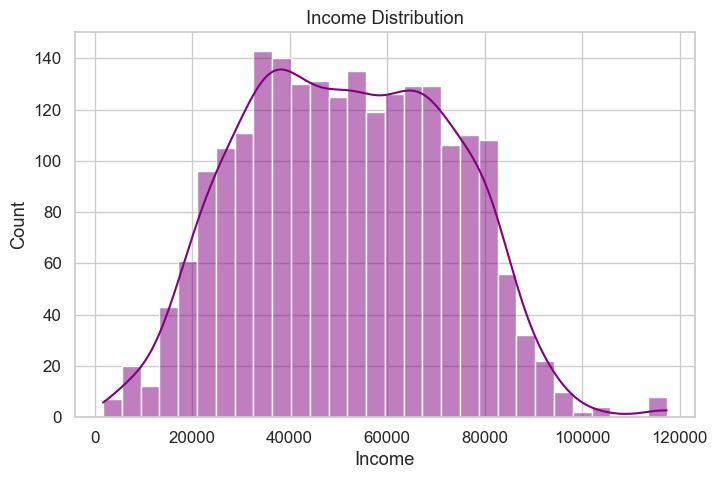

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins=30, kde=True, color="purple")
plt.title("Income Distribution")
plt.show()

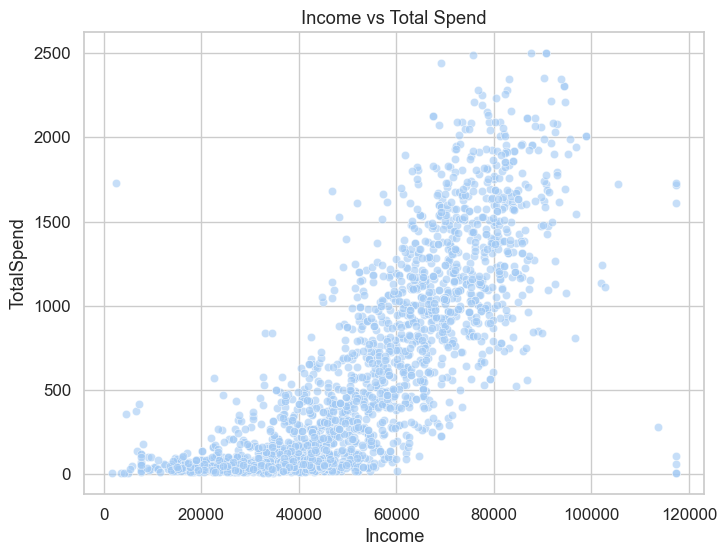

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Income", y="TotalSpend", alpha=0.6)
plt.title("Income vs Total Spend")
plt.show()

In [14]:
spend_cols = ['MntWines','MntFruits','MntMeatProducts',
              'MntFishProducts','MntSweetProducts','MntGoldProds']
category_spend = df[spend_cols].sum().sort_values(ascending=False)

C:\Users\Hp\AppData\Local\Temp\ipykernel_6076\1873515159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_spend.index, y=category_spend.values, palette="magma")


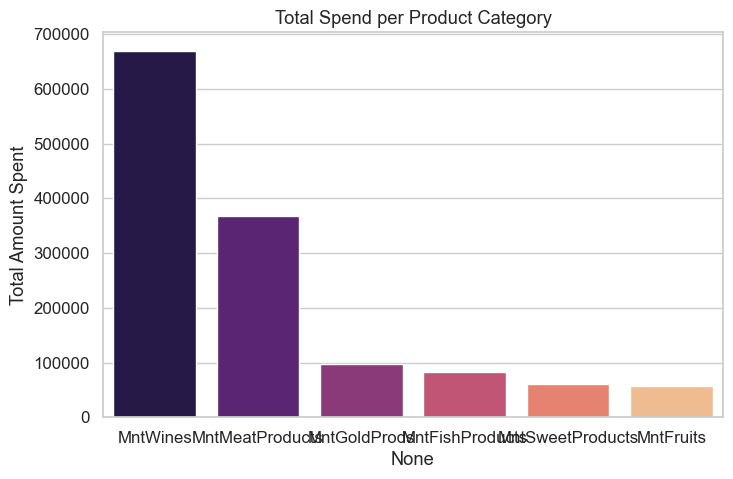

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x=category_spend.index, y=category_spend.values, palette="magma")
plt.title("Total Spend per Product Category")
plt.ylabel("Total Amount Spent")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_6076\1125397801.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_success.index, y=campaign_success.values, palette="coolwarm")


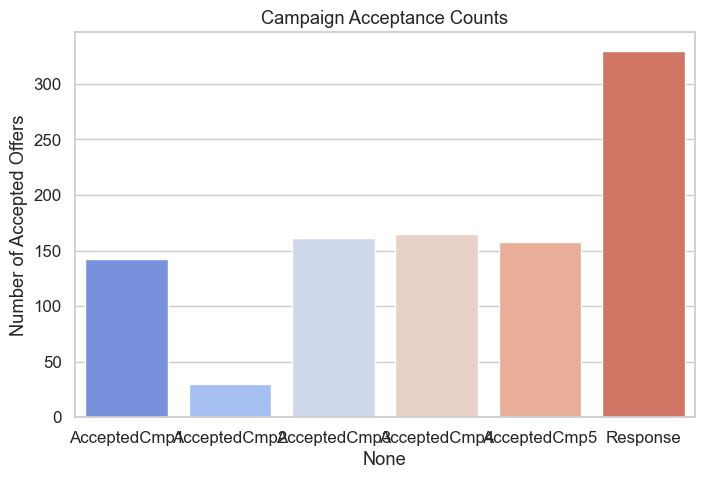

In [16]:
# --- Campaigns ---
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
                 'AcceptedCmp4','AcceptedCmp5','Response']
campaign_success = df[campaign_cols].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=campaign_success.index, y=campaign_success.values, palette="coolwarm")
plt.title("Campaign Acceptance Counts")
plt.ylabel("Number of Accepted Offers")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_6076\1813997675.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AgeGroup", y="Response", data=df, estimator=sum, palette="crest")


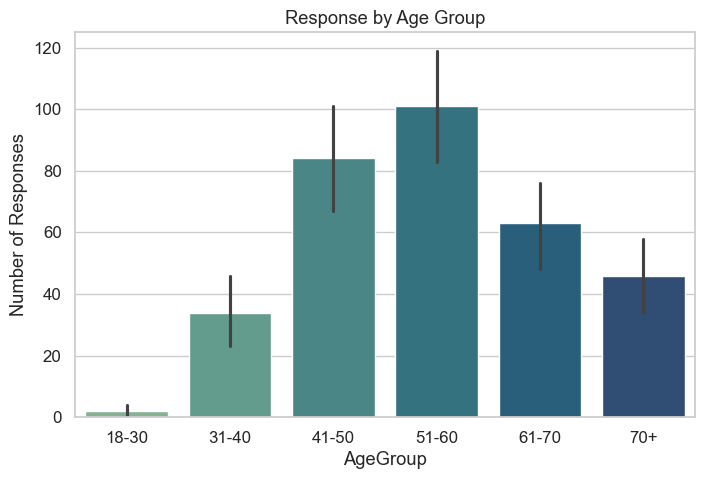

In [17]:
df["AgeGroup"] = pd.cut(df["Age"],
                        bins=[18,30,40,50,60,70,100],
                        labels=["18-30","31-40","41-50","51-60","61-70","70+"])

plt.figure(figsize=(8,5))
sns.barplot(x="AgeGroup", y="Response", data=df, estimator=sum, palette="crest")
plt.title("Response by Age Group")
plt.ylabel("Number of Responses")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_6076\1535980573.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_usage.index, y=channel_usage.values, palette="flare")


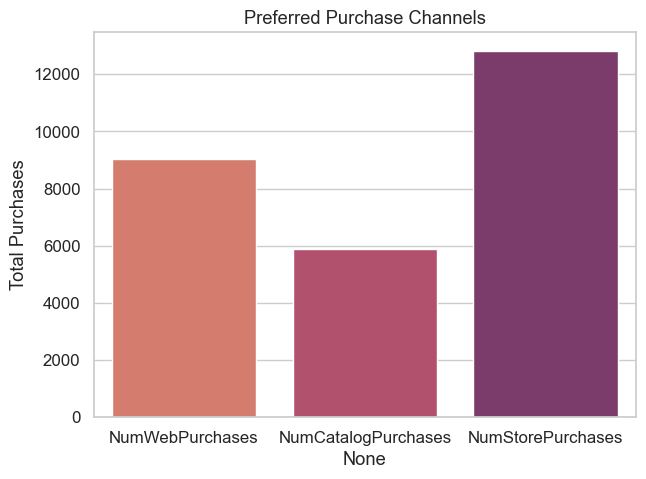

In [18]:
# --- Purchase Channels ---
channel_cols = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
channel_usage = df[channel_cols].sum()

plt.figure(figsize=(7,5))
sns.barplot(x=channel_usage.index, y=channel_usage.values, palette="flare")
plt.title("Preferred Purchase Channels")
plt.ylabel("Total Purchases")
plt.show()

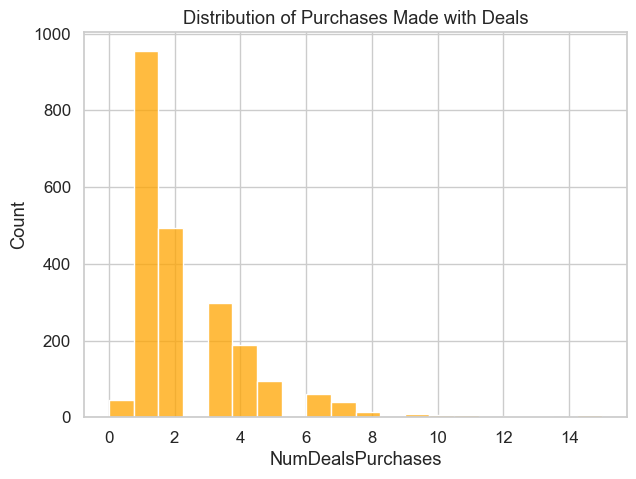

In [19]:
plt.figure(figsize=(7,5))
sns.histplot(df['NumDealsPurchases'], bins=20, color="orange")
plt.title("Distribution of Purchases Made with Deals")
plt.show()

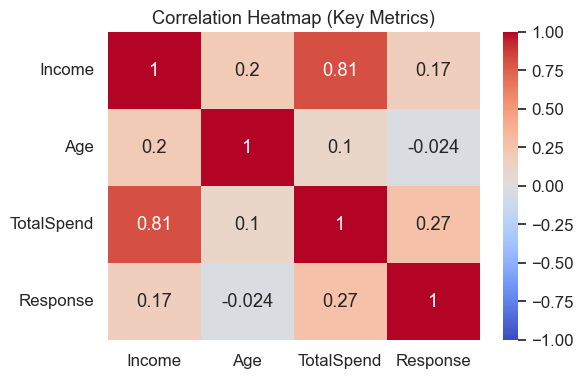

In [20]:

# --- Correlation ---
focus_cols = ['Income','Age','TotalSpend','Response']
plt.figure(figsize=(6,4))
sns.heatmap(df[focus_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Key Metrics)")
plt.show()


In [21]:
print("Final Shape:", df.shape)
print("Final Columns:", df.columns.tolist())

Final Shape: (2220, 34)
Final Columns: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'TotalSpend', 'TotalAcceptedOffers', 'ResponseRate', 'AgeGroup']


In [22]:
# -----------------------------
# 9. Save Final Dataset
# -----------------------------
df.to_csv("cleaned_customer_data.csv", index=False)
print("Cleaned dataset saved as cleaned_marketing_campaign.csv")


Cleaned dataset saved as cleaned_marketing_campaign.csv
